# Synthetic data

The aim of this notebook is to illustrate the PCA tool using synthetically generated data.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from scipy.spatial import distance
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

##### Data creation

In [2]:
# Synthetic data
N = 900
alpha = 25
beta = 10
gamma = 25
mu1 = 10
mu2 = 50
df = pd.DataFrame()
nb_comp = 5
var = 5
targets = ['Set 1', 'Set 2', 'Set 3']
#df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 3, N)
df['age'] = np.round(np.random.uniform(0,100, N))
#df['age'] = np.round(np.random.normal(50, 2, N))
df['particle 1'] =  np.random.normal(10, var,N)
df['particle 2'] =  np.random.normal(mu1, var,N) + np.random.normal(mu2, var,N)
df['desease 1'] = df['particle 1']*alpha + beta*df['age']
df['disease 2'] = df['particle 2']*gamma 

print('Synthetic data')
display(df)

Synthetic data


,age,particle 1,particle 2,desease 1,disease 2
0,47.0,8.955109,68.995197,693.877713,1724.879917
1,63.0,8.337591,63.464890,838.439775,1586.622250
2,89.0,18.298457,71.712060,1347.461434,1792.801497
3,62.0,9.623975,64.688753,860.599369,1617.218833
4,52.0,8.743455,53.889307,738.586377,1347.232684
...,...,...,...,...,...
895,6.0,9.917380,60.255921,307.934498,1506.398015
896,57.0,6.972953,61.160806,744.323823,1529.020153
897,24.0,7.089549,68.102189,417.238718,1702.554734
898,41.0,10.191585,69.155372,664.789634,1728.884311


##### Apply PCA to Data

In [3]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()

# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

After PCA
Singular values: [4.26086984e+01 4.21239011e+01 3.00844774e+01 2.44462381e-14
 9.54265059e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,-1.507588,0.957799,-0.111377,2.328616e-14,-2.416864e-17,0.0
1,-0.266215,0.779666,-0.468344,-6.450104e-15,-3.758402e-16,0.0
2,-0.038424,3.520180,1.105459,-2.054047e-16,4.980340e-15,0.0
3,-0.383752,1.000984,-0.207735,4.966102e-17,-4.412413e-16,0.0
4,0.900838,-0.762403,-0.310674,8.617039e-17,3.379189e-16,0.0
...,...,...,...,...,...,...
895,-1.272020,-1.484041,0.543367,-2.172021e-16,1.197312e-16,1.0
896,-0.188741,0.173014,-0.659819,3.833786e-17,2.028060e-17,1.0
897,-2.160290,-0.108294,-0.167533,6.763318e-17,-4.126083e-18,1.0
898,-1.609148,0.868050,0.197891,8.381010e-17,-1.184280e-16,1.0


##### Plots

In [6]:
def plot_PCA(comp_1, comp_2):
    
    x = PCA_df.iloc[:,comp_1]
    y = PCA_df.iloc[:,comp_2]

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.25]
    rect_histy = [left_h, bottom, 0.25, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(12, 12))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    targets = ['young', 'old']

    # the scatter plot:
    for idt, _ in enumerate(targets):
        axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,comp_1], 
                   PCA_df[PCA_df['label'] == idt].iloc[:,comp_2])


    # now determine nice limits by hand:
    binwidth = 0.2
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axHistx.set_xticks([])
    axHisty.set_yticks([])

    axScatter.legend(targets)
    axScatter.grid()
    axScatter.set_xlabel('Component #'+str(comp_1+1), fontsize = 15)
    axScatter.set_ylabel('Component #'+str(comp_2+1), fontsize = 15)
    plt.savefig("figures/synthetic_data_pca" + str(comp_1) + str(comp_2) + ".png")
    plt.show()

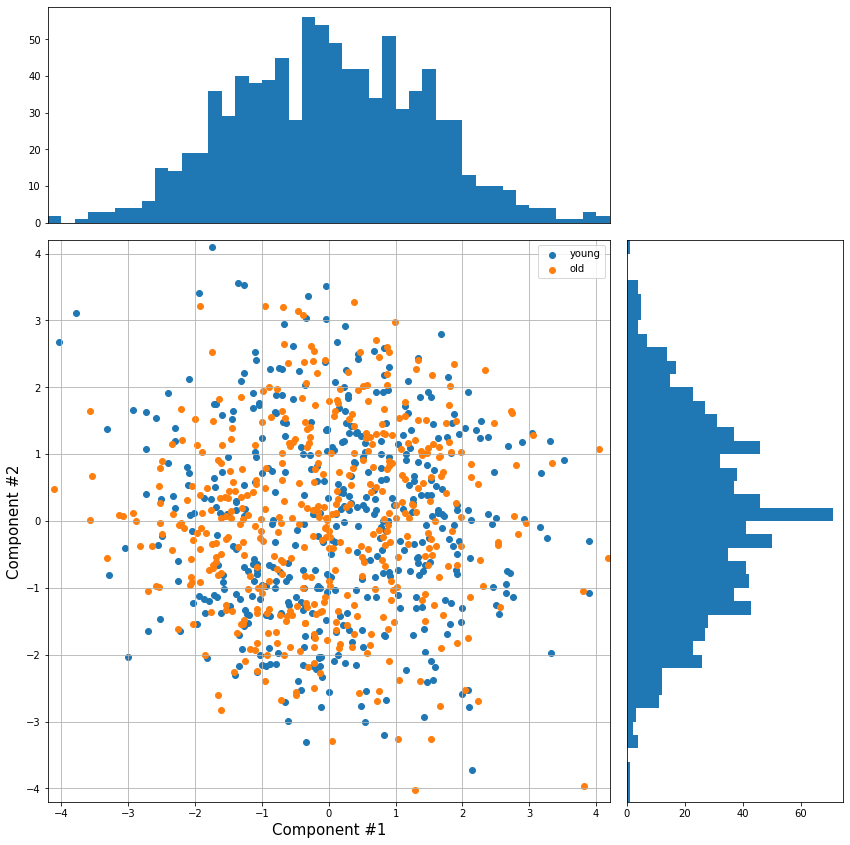

In [7]:
plot_PCA(0,1)

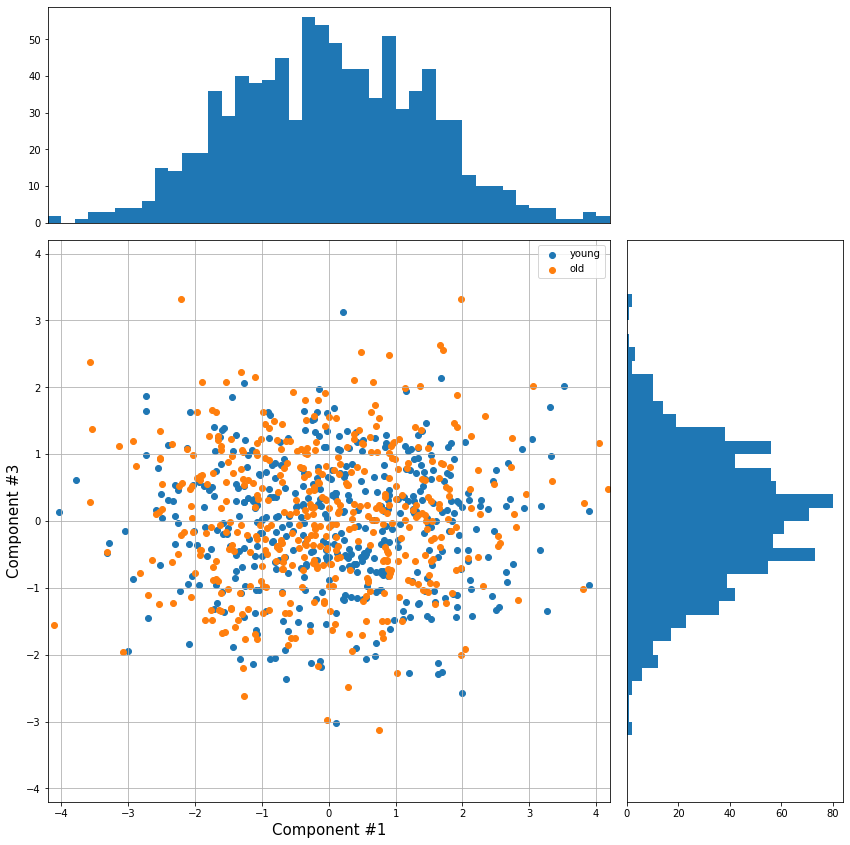

In [8]:
plot_PCA(0,2)

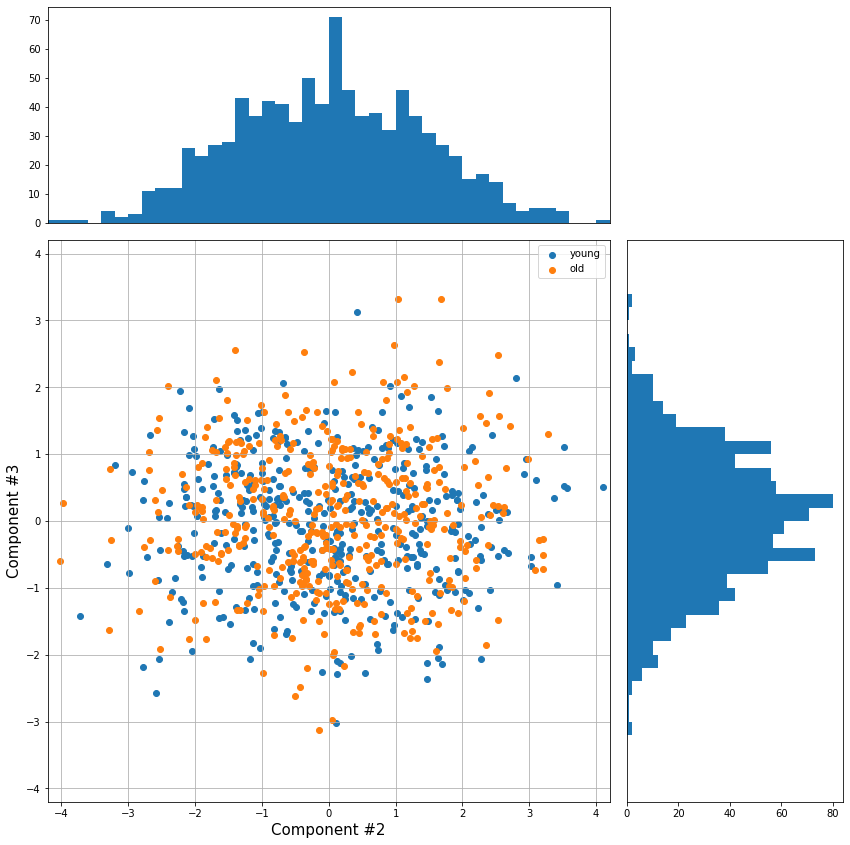

In [9]:
plot_PCA(1,2)

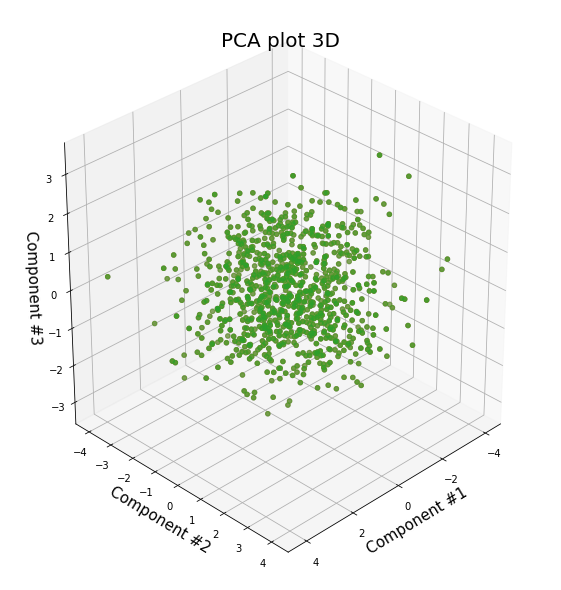

In [10]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)

for idt, _ in enumerate(targets):
    ax.scatter(PCA_df.iloc[:,0], 
               PCA_df.iloc[:,1],
               PCA_df.iloc[:,2])

ax.grid()
ax.set_xlabel(PCA_df.columns[0], fontsize = 15)
ax.set_ylabel(PCA_df.columns[1], fontsize = 15)
ax.set_zlabel(PCA_df.columns[2], fontsize = 15)
ax.set_title('PCA plot 3D', fontsize = 20)
plt.show()

#### Correlation circle

,age,particle 1,particle 2,desease 1,disease 2
0,0.405729,0.191852,-0.545827,0.450246,-0.545827
1,0.512749,0.186504,0.448949,0.546986,0.448949
2,-0.384234,0.922638,0.022747,0.008256,0.022747
3,-0.651756,-0.277739,0.007634,0.705661,-0.007634
4,-0.007037,-0.002999,-0.707066,0.007619,0.707066


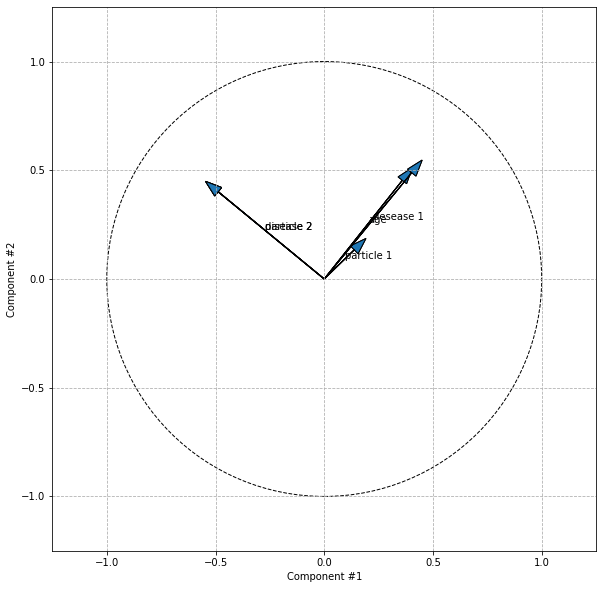

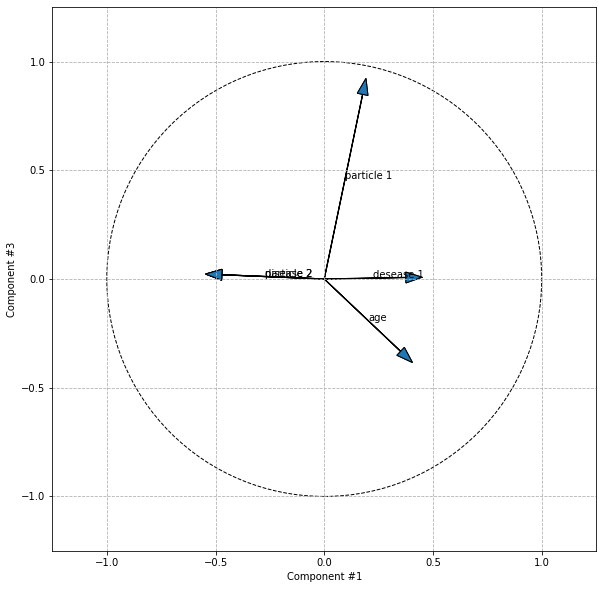

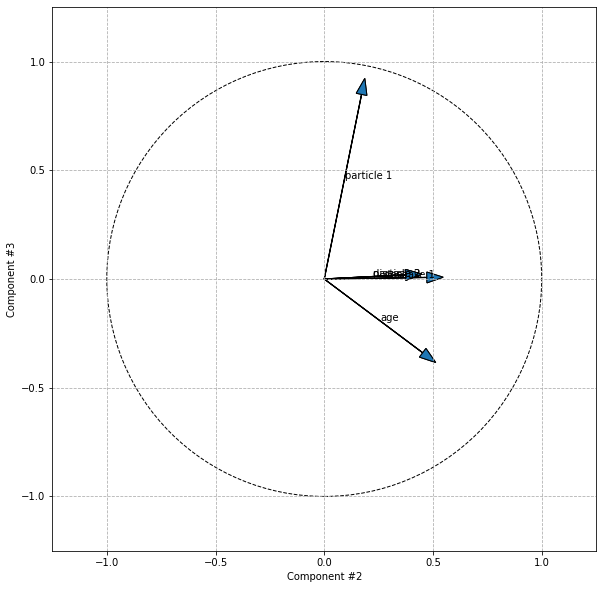

In [12]:
circle_df = pd.DataFrame(data=[[pca.components_[c,n] for n in range(pca.n_components_)] for c in range(pca.n_components_)], index=[0,1,2,3,4], columns = df.columns[:-1])
display(circle_df)


# Plot 0 vs 1
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in df.iloc[:,:-1]:
    ax.annotate(c, xy=(circle_df[c][0]/2, circle_df[c][1]/2))
    ax.add_artist(plt.arrow(0, 0, circle_df[c][0], circle_df[c][1], head_width=0.05, length_includes_head=True))
    
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.xlabel('Component #1')
plt.ylabel('Component #2')
plt.savefig('figures/synthetic_data_corr_circle1.png')
plt.show()

# Plot 0 vs 2
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in df.iloc[:,:-1]:
    ax.annotate(c, xy=(circle_df[c][0]/2, circle_df[c][2]/2))
    ax.add_artist(plt.arrow(0, 0, circle_df[c][0], circle_df[c][2], head_width=0.05, length_includes_head=True))
    
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.xlabel('Component #1')
plt.ylabel('Component #3')
plt.savefig('figures/synthetic_data_corr_circle2.png')
plt.show()

# Plot 1 vs 2
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

circle1 = plt.Circle((0, 0), 1, color='k', linestyle='--', fill=False)
ax.add_artist(circle1)

for c in df.iloc[:,:-1]:
    ax.annotate(c, xy=(circle_df[c][1]/2, circle_df[c][2]/2))
    ax.add_artist(plt.arrow(0, 0, circle_df[c][1], circle_df[c][2], head_width=0.05, length_includes_head=True))
    
ax.set_aspect(1)
plt.grid(linestyle='--')
plt.xlabel('Component #2')
plt.ylabel('Component #3')
plt.savefig('figures/synthetic_data_corr_circle3.png')
plt.show()

In [13]:
# Square cosine see: https://biosakshat.github.io/pca.html
pd.DataFrame(data=pca.components_**2, index=[0,1,2,3,4],  columns= df.columns[:-1])

,age,particle 1,particle 2,desease 1,disease 2
0,0.164616,0.036807,0.297927,0.202722,0.297927
1,0.262912,0.034784,0.201555,0.299194,0.201555
2,0.147636,0.851261,0.000517,0.000068,0.000517
3,0.424786,0.077139,0.000058,0.497958,0.000058
4,0.000050,0.000009,0.499942,0.000058,0.499942
